<a href="https://colab.research.google.com/github/TheGreemDark/LR3_ML/blob/main/LR3_ML_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель Блокнота

Решение задачи классификации в scikit-learn с помощью линейной модели - логистическая регрессия
* Применение `LabelEncoding` для изменения целевой переменной
* Обучение класса `LogisticRegression` и анализ атрибутов
* Анализ модели для разных данных
* Сохранение модели

# Import библиотек

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn
from sklearn.preprocessing import LabelEncoder# Импортируем LabelEncoder от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files  # чтобы загружать файлы в облако через проводник

#Набор данных
**Оценка возможности открытия депозитного счета в банке**

Набор данных, собранный в рамках маркетинговой кампании португальского банка, целью которой было телефонное продвижение банковского депозита (продукта term deposit), включает результаты прямого обзвона клиентов и информацию о них, чтобы предсказать, согласится ли клиент открыть депозит.

В датасете более 45 тысяч записей, каждая строка — один контакт с клиентом.

Всего около 17 атрибутов разных типов (категориальные и числовые).

Целевой параметр для задачи классификации — переменная y (yes/no), которая показывает, согласился ли клиент открыть срочный депозит после контакта.

#Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload() #запуск и выбор файла в проводнике

Saving bank-full.csv to bank-full.csv


#Считывание файла в DataFrame
Используется метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/bank-full.csv', delimiter = ';') # Открытие загруженного файла, через полный путь к файлу (с именем)
df # В этом блокноте мы работаем с данными без дубликатов

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Список числовых и категориальных данных

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Подробное описание каждого из столбцов.

age — возраст клиента (число)

job — профессия клиента (например, "admin", "technician" и т.д.)

marital — семейное положение ("married", "single", "divorced")

education — уровень образования ("primary", "secondary", "tertiary")

default — наличие невыплаченного кредита (yes/no)

balance — текущий баланс на счёте клиента (в евро)

housing — наличие ипотечного кредита (yes/no)

loan — наличие личного кредита (yes/no)

contact — способ связи с клиентом ("cellular", "telephone", "unknown")

day — день месяца последнего контакта (число)

month — месяц последнего контакта (например, "jan", "feb" и т.д.)

duration — длительность последнего звонка в секундах (число)

campaign — количество контактов с клиентом за текущую кампанию (число)

pdays — количество дней после последнего контакта в предыдущей кампании (число; 999 означает, что контакта не было)

previous — количество контактов с клиентом в предыдущих кампаниях (число)

poutcome — результат предыдущей маркетинговой кампании ("success", "failure", "other", "unknown")

y — целевая переменная: отклик клиента на маркетинговую кампанию (yes/no)

Предварительная обработка из [LR1_ML](https://elearn.urfu.ru/pluginfile.php/965749/assignsubmission_file/submission_files/2111145/LR1_ML.ipynb?forcedownload=1)

Из предварительной обработки исключена колонка `y`, поскольку она является целевой меткой и будет обработана отдельно


In [ ]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [ ]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [ ]:
#Степенное преобразование
num_pipe_age_balance_duration_day = Pipeline([
    ('power', PowerTransformer())
])

num_age_balance_duration_day = ['age', 'balance', 'day', 'duration']

#Стандартизация
num_pipe_campaign_pdays_previous = Pipeline([
    ('scaler', StandardScaler())
])

num_campaign_pdays_previous = ['campaign', 'pdays', 'previous']

#one-hot кодирование
cat_pipe_category_job = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])

cat_category_job = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_age_balance_duration_day', num_pipe_age_balance_duration_day, num_age_balance_duration_day),
    ('num_campaign_pdays_previous', num_pipe_campaign_pdays_previous, num_campaign_pdays_previous),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_age_balance_duration_day', num_pipe_age_balance_duration_day, num_age_balance_duration_day),
    ('num_campaign_pdays_previous', num_pipe_campaign_pdays_previous, num_campaign_pdays_previous),
    ('cat_category_job', cat_pipe_category_job, cat_category_job),
])

In [ ]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns_num = np.hstack([num_age_balance_duration_day,
                   num_campaign_pdays_previous,
                    cat_category_job,
                        ])

# Логистическая Регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.metrics import ConfusionMatrixDisplay # матрица ошибок


**Считываем данные, разбиваем на тестовую и тренировочную**

In [ ]:
# удаление целевой переменной "отклик клиента на маркетинговую кампанию" из признаков
X,y = df.drop(columns = ['y']), df['y']

## Приводим целевые метки к 0 и 1

Для этого воспользуемся объектом `LabelEncoder()` из модуля `preprocessing`


In [ ]:
Label = LabelEncoder()
Label.fit(y) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

array(['no', 'yes'], dtype=object)

то есть `0` это 'no', а `1` это 'yes'

In [ ]:
target = Label.transform(y) # преобразуем и сохраняем в новую переменную

In [ ]:
target # здесь уже только 0 и 1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, target,
                                                    test_size=0.3,
                                                    random_state=42)

# Оценка модели с использованием только числовых данных

**Преобразуем данные**

In [ ]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

**Обучаем модель**

In [ ]:
model = LogisticRegression(random_state = 42)

model.fit(X_train_prep, y_train);

## Подготовка функций для анализа обученной модели

**вытаскивание коэффициентов из модели**

In [ ]:
def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_[0]
    return B0, B

**написание модели**

In [ ]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

**визуализации весов в виде столбчатых диаграмм**

In [ ]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Уравнение модели

In [ ]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
-2.718+0.02*age+0.18*balance-0.01*day+1.35*duration-0.32*campaign+0.22*pdays+0.22*previous


### Визуализируем веса в виде столбчатых диаграмм

In [ ]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

- Важнейший признак для модели — duration (продолжительность), оказывающий сильное положительное влияние.
- Значительный отрицательный базовый вес (b0) смещает модель.
- Остальные признаки имеют малое влияние и слабую значимость.
- Признак campaign единственный из оставшихся с заметным отрицательным весом.

Модель опирается в основном на продолжительность события при предсказании и использует смещение для корректировки базового уровня.

## Оценка метрик

In [ ]:
def calculate_metric(model_pipe, X, y, metric = f1_score):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (f1 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

f1 на тренировочной выборке: 0.2644
f1 на валидационной выборке: 0.2556


Значения очень малы, необходимо это исправить

In [ ]:
print(classification_report(y_val, model.predict(X_val_prep), target_names=Label.classes_))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11966
         yes       0.54      0.17      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



## Кросс-валидация

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [ ]:
scoring_clf = {'ACC': 'accuracy',
           'F1': 'f1_micro',
           'Precision': 'precision_weighted',
           'Recall': 'recall_macro'}

In [ ]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.015749,0.006991,0.886888,0.886888,0.858857,0.577831
1,0.015733,0.007020,0.891469,0.891469,0.868444,0.579220
2,0.013738,0.006984,0.889398,0.889398,0.863878,0.582789
3,0.014061,0.006485,0.889714,0.889714,0.864328,0.578263
4,0.014565,0.006621,0.887502,0.887502,0.859407,0.571718




test_ACC          0.888994
test_F1           0.888994
test_Precision    0.862983
test_Recall       0.577964
dtype: float64


На кросс-валидации точность предсказания возрастает (89%) по сравнению с изначальной оценкой модели (26%)

## Матрица ошибок



Есть три варианта отображения
* нормированный (по строкам)

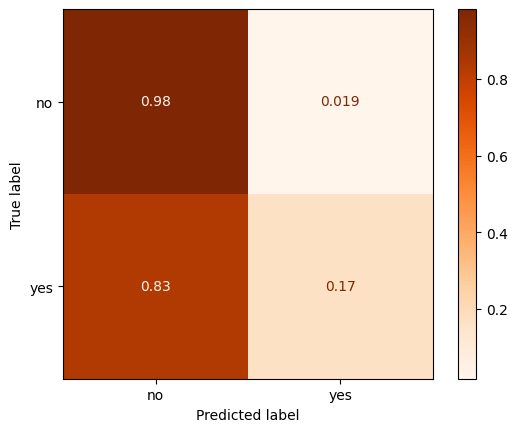

In [ ]:
ConfusionMatrixDisplay.from_estimator(
        model,
        X_val_prep,
        y_val,
        display_labels=Label.classes_,
         cmap=plt.cm.Oranges,
        normalize='true',
    );

- Модель очень хорошо распознаёт отрицательный класс (accuracy 98% по "no").
- Для положительного класса точность хуже: 83% верных предсказаний, но 17% пропущены, что может быть критично в задачах, где важно выявить все положительные случаи.
- Ошибки ложного отрицания (missed positives) значительно выше ложных положительных. Это нужно учитывать при оценке модели.

## Мини-выводы

Небольшие выводы по модели:

* используя только 7 числовых признака можно предсказывать отклик клиента на маркетинговую кампанию, но с недостаточной точностью

* модель выглядит "логично": с pdays, duration, age, balance и previous "увеличивается" вероятность того, что клиент согласится открыть депозитный счет, а с ростом остальных параметров увеличивается вероятность того, что клтент откажется

# Объединение Pipeline предобработки и модели

Синтаксис - тот же
список из
* имен
* объектов

In [ ]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', LogisticRegression(random_state = 42))
])

Чтобы "обратиться" к части Pipeline - достаточно помнить "имя"

In [ ]:
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_age_balance_duration_day',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['age', 'balance', 'day', 'duration']),
                                ('num_campaign_pdays_previous',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['campaign', 'pdays', 'previous'])])

In [ ]:
pipe_num['model']

LogisticRegression(random_state=42)

Обучаем через `.fit()`

In [ ]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_age_balance_duration_day',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['age', 'balance', 'day',
                                                   'duration']),
                                                 ('num_campaign_pdays_previous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['campaign', 'pdays',
                                                   'previous'])])),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-2.718+0.02*age+0.18*balance-0.01*day+1.35*duration-0.32*campaign+0.22*pdays+0.22*previous


In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.2644
f1 на валидационной выборке: 0.2556


Значения не изменились

In [ ]:
print(classification_report(y_val, pipe_num.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11966
         yes       0.54      0.17      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [ ]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.105570,0.015584,0.886888,0.886888,0.858857,0.577831
1,0.125627,0.013053,0.891469,0.891469,0.868444,0.579220
2,0.133109,0.013294,0.889398,0.889398,0.863878,0.582789
3,0.128130,0.013222,0.889556,0.889556,0.863975,0.577585
4,0.130414,0.015568,0.887502,0.887502,0.859407,0.571718




test_ACC          0.888963
test_F1           0.888963
test_Precision    0.862912
test_Recall       0.577829
dtype: float64


На кросс-валидации точность предсказания возрастает (89%) по сравнению с изначальной оценкой модели (26%)

То есть по сравнению с предыдущим шагом точность не изменилась

# Оценим влияние категориальных признаков

In [ ]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', LogisticRegression(random_state = 42))
    ])

In [ ]:
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_age_balance_duration_day',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['age', 'balance', 'day',
                                                   'duration']),
                                                 ('num_campaign_pdays_previous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['campaign', 'pdays',
                                                   'previous']),
                                                 ('cat_category_job',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
cat_category_job_names = pipe_all['preprocessors'].transformers_[2][1]['encoder'].get_feature_names_out(cat_category_job)
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_age_balance_duration_day,
                   num_campaign_pdays_previous,
                    cat_category_job])

In [ ]:
B0, B = get_coefs(pipe_all['model'])
features_names = list(columns)

print_model (B0,B,features_names)

Решение
-0.785-0.04*age+0.05*balance+0.08*day+1.58*duration-0.22*campaign-0.01*pdays+0.01*previous+0.12*job-0.21*marital-0.25*education-0.24*default-0.06*housing+0.34*loan-0.19*contact-0.15*month+0.39*poutcome


**Модификация функции для отрисовки весов**

In [ ]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [ ]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 1,  width = 1600)

- Модель четко различает признаки, способные либо повышать, либо понижать вероятность целевого события.
- Значения весов примерно одинаковы по модулю для положительных и отрицательных признаков, что говорит о сбалансированном влиянии разных факторов.

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.4690
f1 на валидационной выборке: 0.4645


Значения точности возрасли

На тренировочной и валидационной выборках с 26% до 47%

In [ ]:
print(classification_report(y_val, pipe_all.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11966
         yes       0.65      0.36      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [ ]:
cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.442776,0.082709,0.902528,0.902528,0.888224,0.664311
1,0.384732,0.035830,0.899842,0.899842,0.884711,0.660290
2,0.319906,0.035672,0.906620,0.906620,0.894113,0.678984
3,0.348401,0.033126,0.903460,0.903460,0.889742,0.670138
4,0.421490,0.070374,0.901406,0.901406,0.887009,0.666035




test_ACC          0.902771
test_F1           0.902771
test_Precision    0.888760
test_Recall       0.667952
dtype: float64


На кросс-валидации точность предсказания возрастает (90%) по сравнению с изначальной оценкой модели (47%)

# Ненормированная матрица ошибок

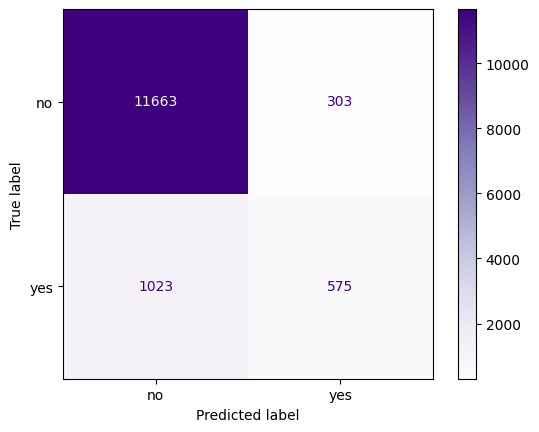

In [ ]:
ConfusionMatrixDisplay.from_estimator(
        pipe_all,
        X_val,
        y_val,
        display_labels=Label.classes_,
         cmap=plt.cm.Purples,

    );

Модель показывает достаточную точность, но требует доработки для повышения полноты (recall) положительного класса.

# Выводы:

* категориальные признаки дают прирост качества предсказания (метрика Accuracy на кросс-валидации растет с `0.26` до `0.47`

* добавляется интерпритация некоторых категориальных признаков: некоторые категории "увеличивают" вероятность того, что клиент откроет депозит, а другие  вероятность того, что клиент откажется открывать депозит

# Сохранение модели

In [ ]:
from joblib import dump, load # в scikit-learn ничего такого особенного нет
# пользуемся joblib

In [ ]:
dump(model, 'model.joblib')  # чтобы сохранить объект
dump(pipe_num, 'pipe_num.joblib')  # чтобы сохранить объект
dump(pipe_all, 'pipe_all.joblib')  # чтобы сохранить объект

['pipe_all.joblib']

In [ ]:
pipe_load = load('pipe_all.joblib')  # чтобы загрузить из файла в формате joblib

In [ ]:
pipe_load

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_age_balance_duration_day',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['age', 'balance', 'day',
                                                   'duration']),
                                                 ('num_campaign_pdays_previous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['campaign', 'pdays',
                                                   'previous']),
                                                 ('cat_category_job',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', LogisticRegression(random_state=42))])